Appliances-Energy-Prediction  --  ML Project

Name : Sanusha Santhosh V

Organization : Entri Elevate

Date : 25th Sept 2024

Overview of Problem Statement:

The goal is to build a machine learning model to predict energy consumption in a building based on various features such as temperature, humidity, and appliances' power usage. This problem can be framed as a regression problem where the target variable (energy consumption) needs to be predicted.

Objective:

The objective is to accurately predict the energy consumption using multiple regression models, optimize the model using hyperparameter tuning, and evaluate the performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 Score.

Data Description:

Source: https://data.world/uci/appliances-energy-prediction

The dataset contains 19,735 entries with 29 columns, and the data covers a variety of environmental and energy-related measurements. 
Here are some insights:

Key Variables:

Appliances: Energy consumption in Wh.
Lights: Energy consumption of lights in Wh.
T1-T9: Indoor temperature measurements from different areas (e.g., kitchen, living room, etc.).
RH_1 - RH_9: Corresponding humidity levels for the indoor temperature readings.
T_out: Outdoor temperature.
Press_mm_hg: Pressure in mmHg.
RH_out: Outdoor humidity.
Windspeed, Visibility, Tdewpoint: Weather-related variables.
rv1, rv2: Random variables included for analysis purposes.

Data Summary:

The appliances' energy consumption ranges from 10 to 310 Wh.
Indoor temperatures (T1-T9) range from approximately 14°C to 28°C, while outdoor temperatures (T_out) vary between -5°C and 26°C.
Humidity values (RH_1 - RH_out) vary between 29% and 100%.


Import Libraries

In [7]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


Loading the Dataset

In [20]:
# Load the dataset

df = pd.read_csv("energydata_complete.csv")

Data Inspection

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [7]:
df.describe(include='object').T

,count,unique,top,freq
date,19735,19735,2016-01-11 17:00:00,1


In [8]:
df.duplicated().sum()

0

Data Preprocessing - Data Cleaning

Handling Missing Values

In [14]:
# Handling Missing Values (if any)
# Checking for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing Values:\n", missing_values)

# Since the data has no missing values, no imputation is needed.


Missing Values:
 date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


The dataset does not contain any missing values, so we can move on to detecting and handling outliers.

Next, we'll use the interquartile range (IQR) method to identify and remove outliers in the numerical columns. 

Remove Outliers

In [16]:
# Outlier Removal using the IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical columns to check for outliers
numerical_columns = df.columns[1:]

# Remove outliers from the numerical columns
cleaned_data = remove_outliers(df.copy(), numerical_columns)

# Check rows removed due to outliers
rows_removed = len(df) - len(cleaned_data)
print(f"Rows removed due to outliers: {rows_removed}")


Rows removed due to outliers: 9629


A total of 9,629 rows with outliers have been removed, leaving us with 10,106 rows in the cleaned dataset.

Next, let's check for skewness in the numerical columns and apply transformations if needed to address skewed data.

Address Skewed Data

In [17]:
# Check for skewness in the numerical columns
skewness = cleaned_data[numerical_columns].skew()

# Filter for highly skewed columns (threshold > 0.75 or < -0.75)
skewed_columns = skewness[abs(skewness) > 0.75]

print("Skewed Columns:\n", skewed_columns)

# Apply log transformation to reduce skewness
import numpy as np

for col in skewed_columns.index:
    cleaned_data[col] = np.log1p(cleaned_data[col])

# Check skewness after transformation
new_skewness = cleaned_data[skewed_columns.index].skew()
print("New Skewness after transformation:\n", new_skewness)


Skewed Columns:
 Appliances    1.333679
dtype: float64
New Skewness after transformation:
 Appliances    0.056491
dtype: float64


Exploratory Data Analysis (EDA) :

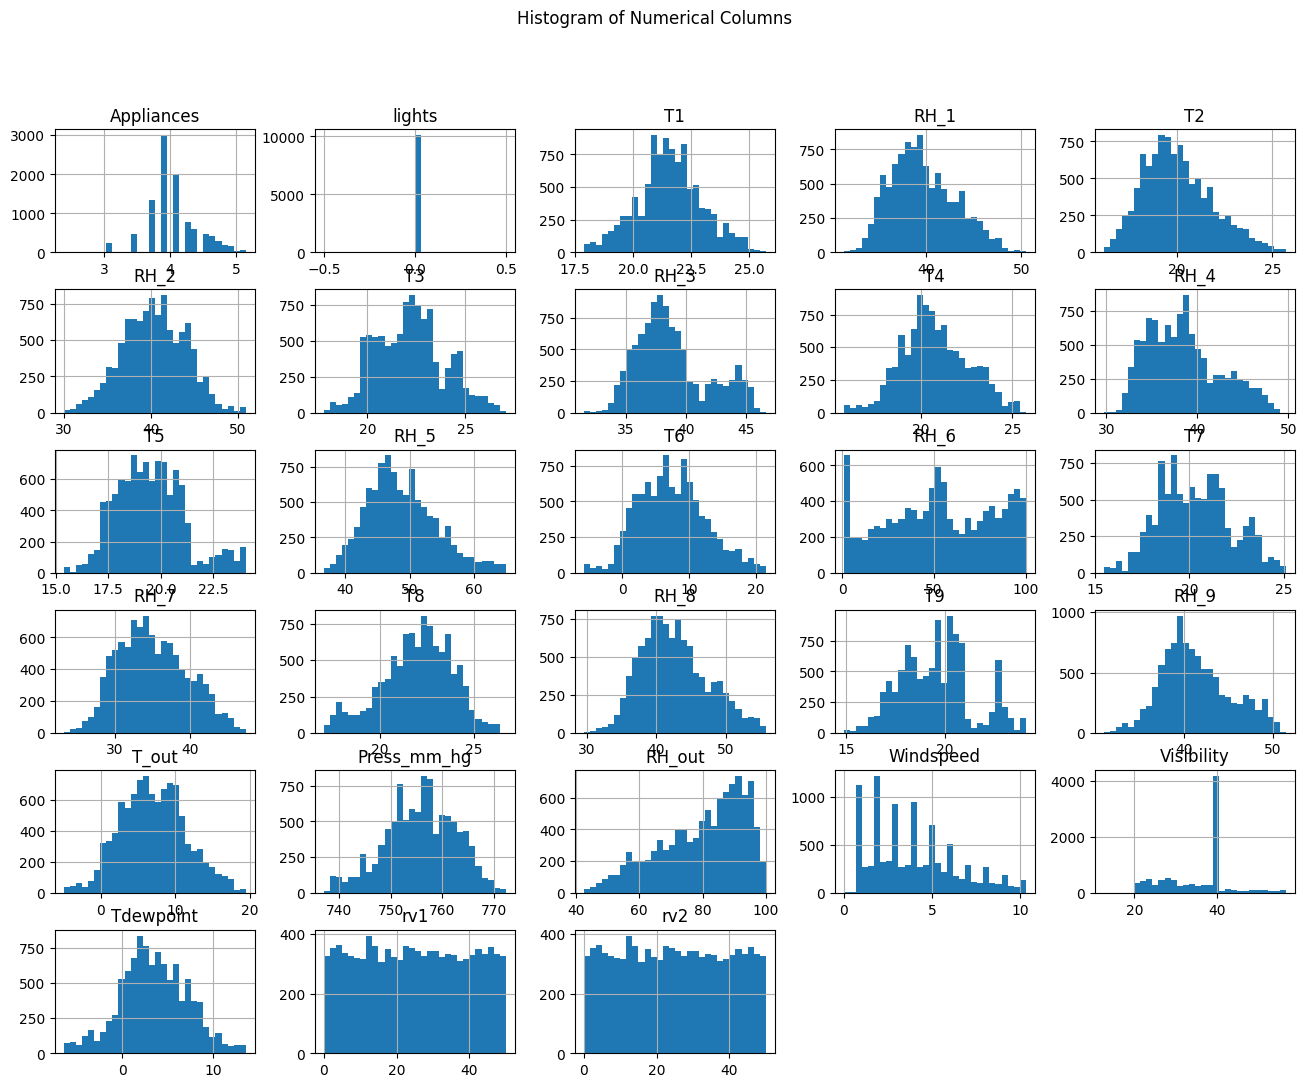

In [18]:
# Plot histograms for all numerical columns
cleaned_data.hist(figsize=(16, 12), bins=30)
plt.suptitle('Histogram of Numerical Columns')
plt.show()


<Figure size 1600x1200 with 0 Axes>

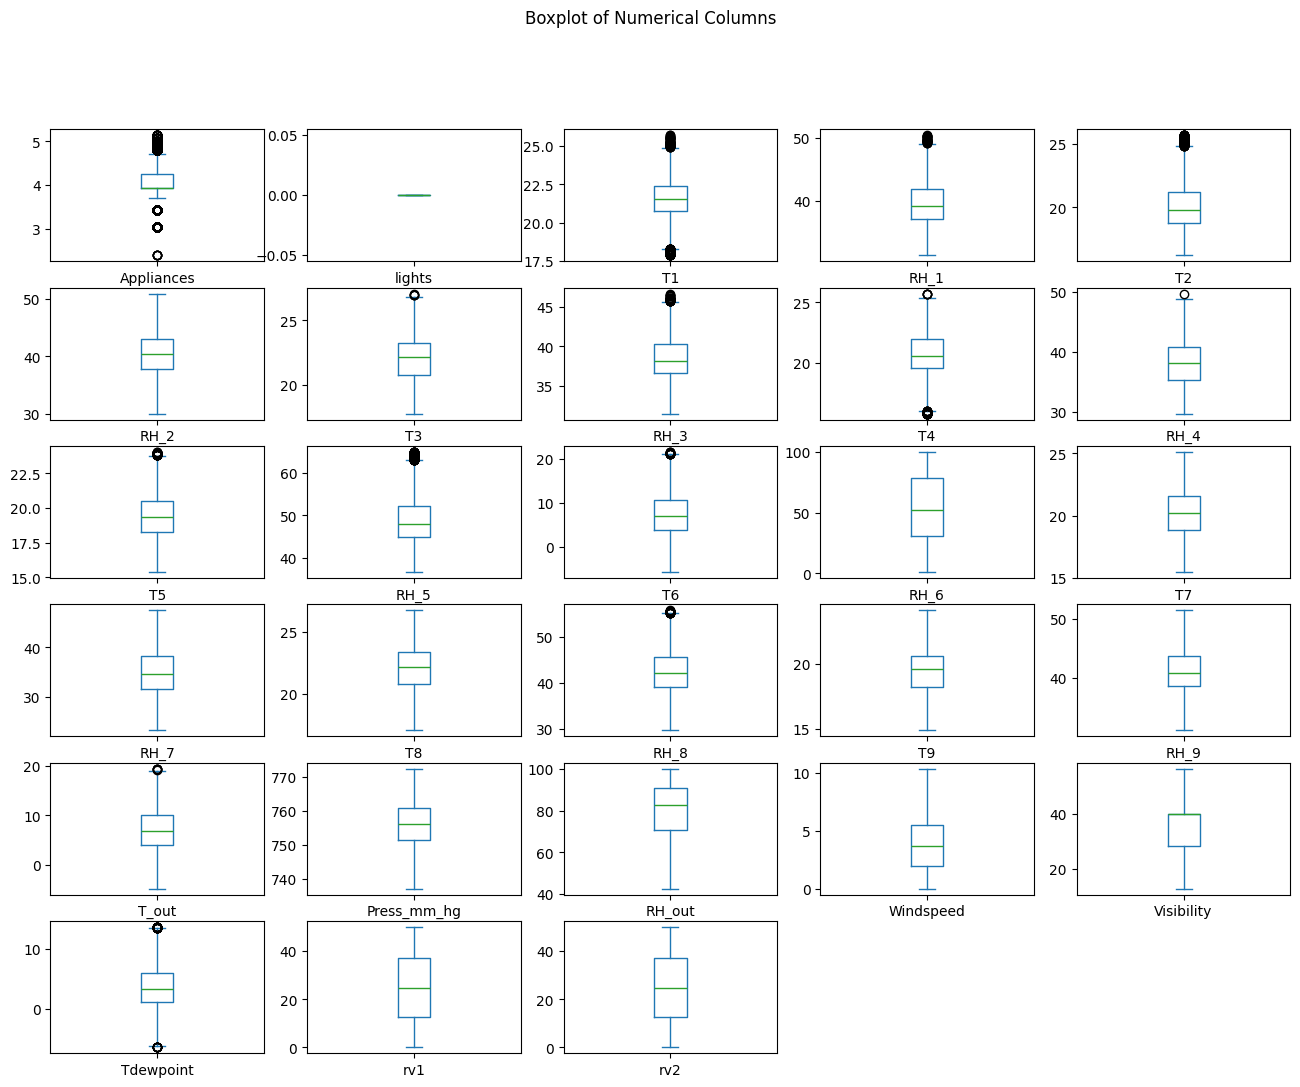

In [19]:
# Plot boxplots for numerical columns
plt.figure(figsize=(16, 12))
cleaned_data[numerical_columns].plot(kind='box', subplots=True, layout=(6, 5), figsize=(16, 12), sharex=False, sharey=False)
plt.suptitle('Boxplot of Numerical Columns')
plt.show()


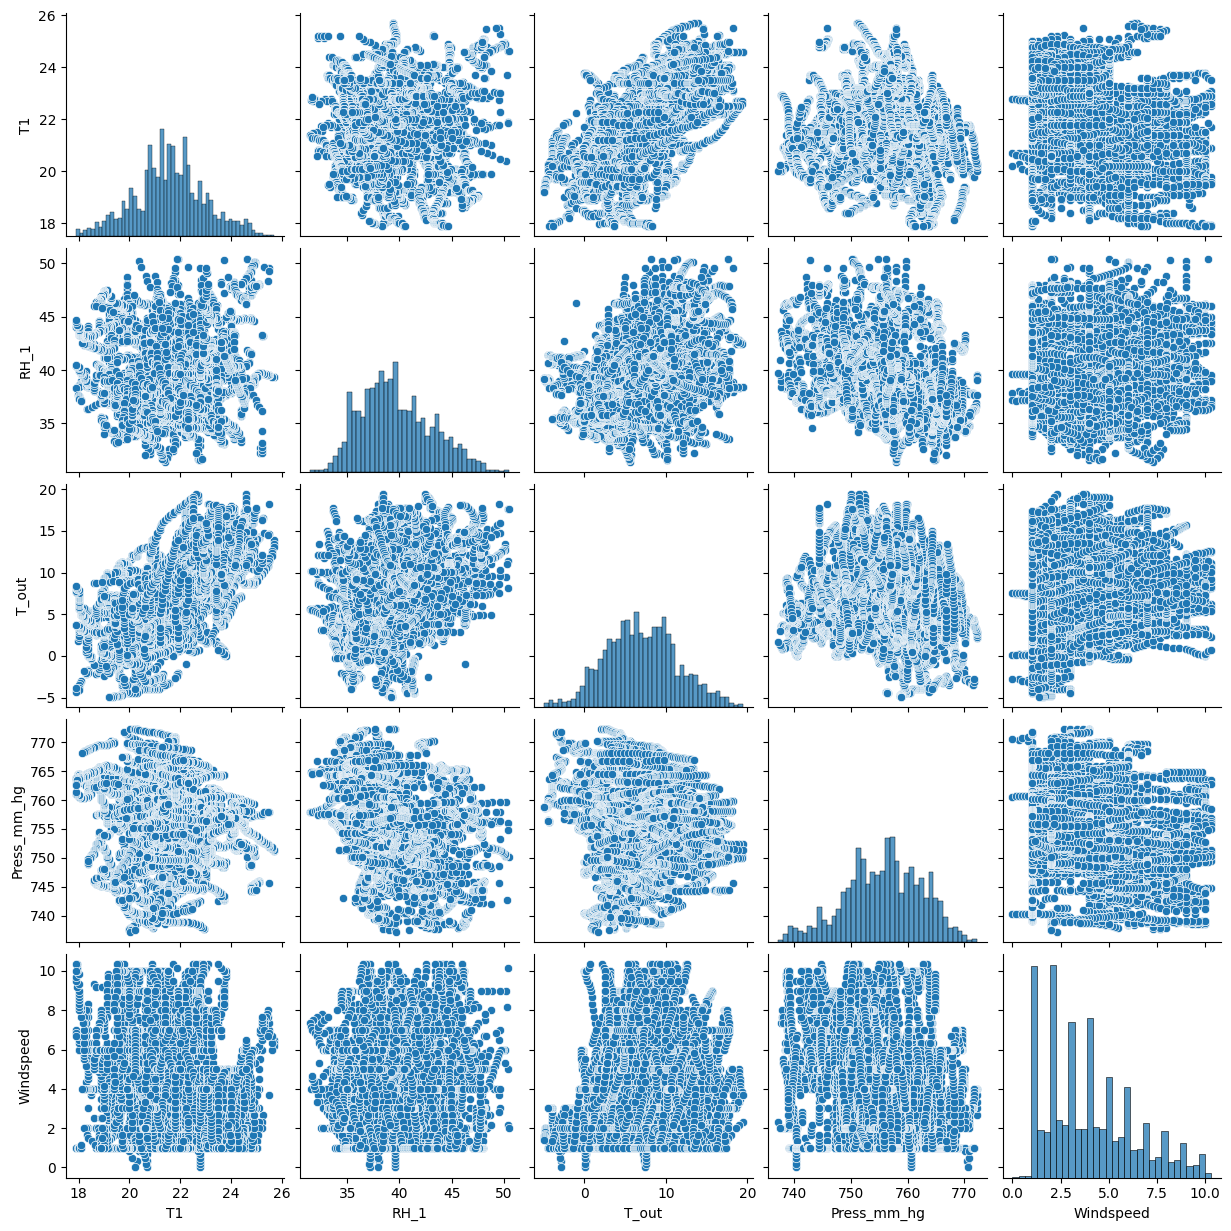

In [20]:
# Pair plot for a subset of the dataset (to avoid crowding)
sns.pairplot(cleaned_data[['T1', 'RH_1', 'T_out', 'Press_mm_hg', 'Windspeed']])
plt.show()


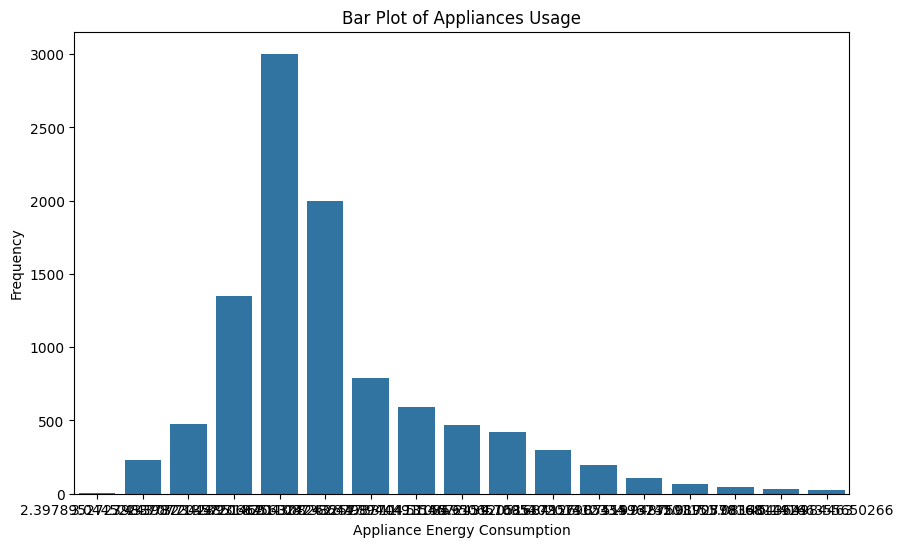

In [23]:
# Plotting bar plot for appliances usage
plt.figure(figsize=(10, 6))
sns.barplot(x=cleaned_data['Appliances'].value_counts().index, y=cleaned_data['Appliances'].value_counts().values)
plt.title('Bar Plot of Appliances Usage')
plt.xlabel('Appliance Energy Consumption')
plt.ylabel('Frequency')
plt.show()


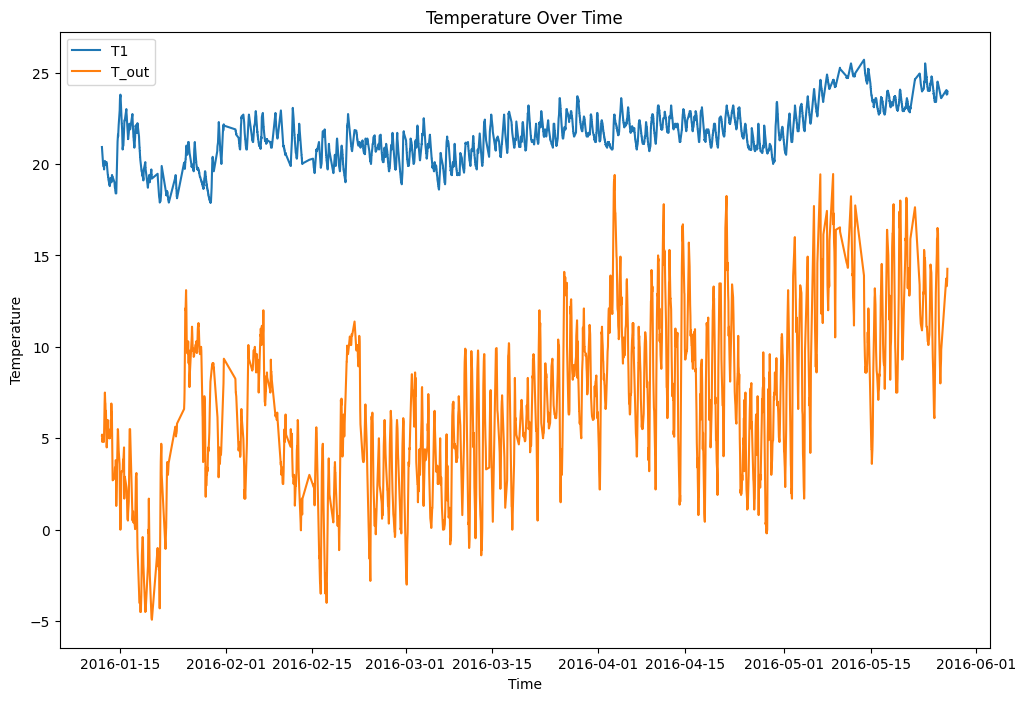

In [26]:
# Converting 'date' to datetime type
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])

# Line plot for temperature over time
plt.figure(figsize=(12, 8))
plt.plot(cleaned_data['date'], cleaned_data['T1'], label='T1')
plt.plot(cleaned_data['date'], cleaned_data['T_out'], label='T_out')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


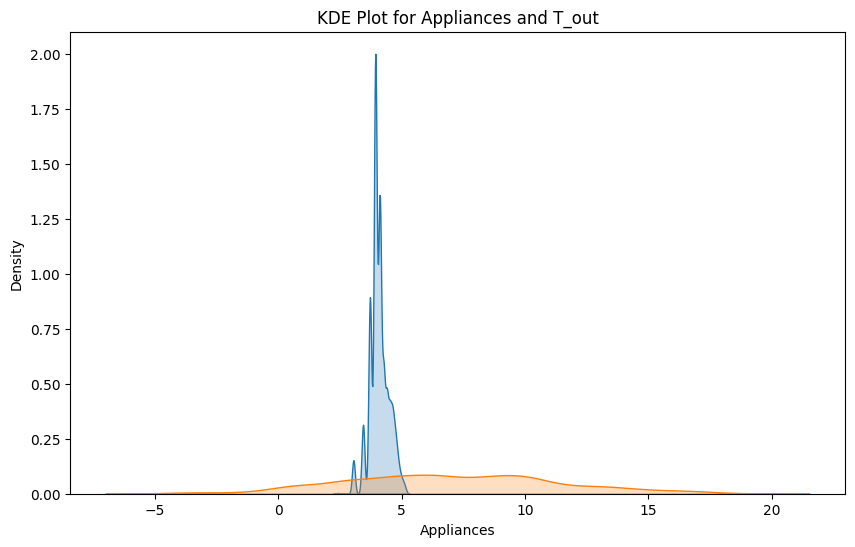

In [28]:
# KDE plot for 'Appliances' and 'T_out'
plt.figure(figsize=(10, 6))
sns.kdeplot(cleaned_data['Appliances'], label='Appliances', fill=True)
sns.kdeplot(cleaned_data['T_out'], label='T_out', fill=True)
plt.title('KDE Plot for Appliances and T_out')
plt.show()


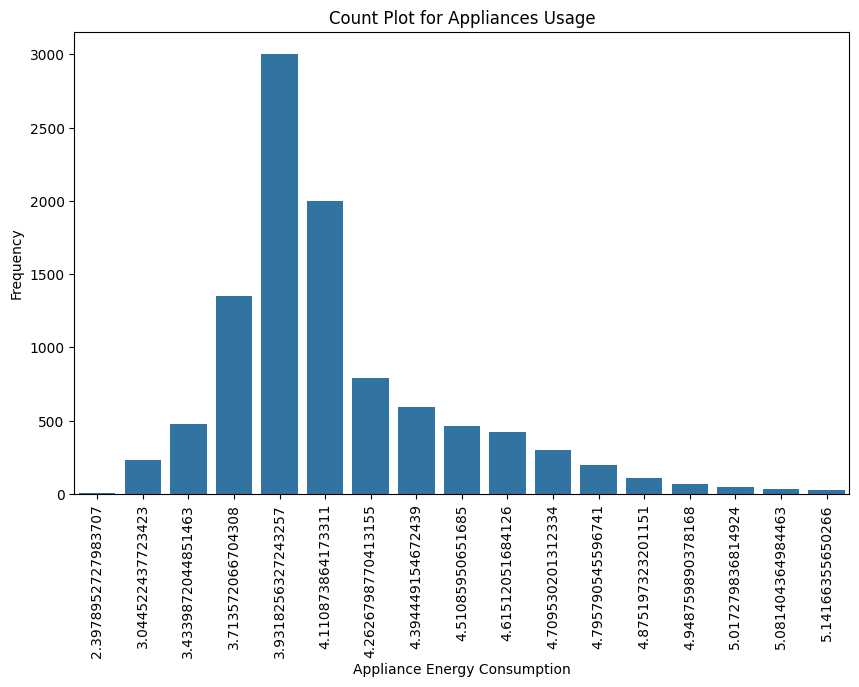

In [30]:
# Count plot for Appliances
plt.figure(figsize=(10, 6))
sns.countplot(x='Appliances', data=cleaned_data)
plt.title('Count Plot for Appliances Usage')
plt.xlabel('Appliance Energy Consumption')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()


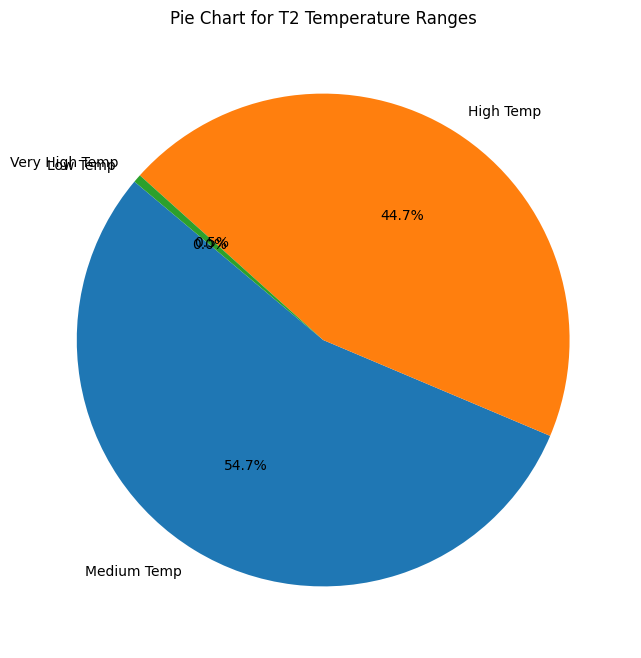

In [47]:
# Categorizing T2 into temperature ranges (low, medium, high)
bins = [0, 15, 20, 25, float('inf')]
labels = ['Low Temp', 'Medium Temp', 'High Temp', 'Very High Temp']

# Creating a new column for temperature range based on T2 values
cleaned_data['T2_Temperature_Range'] = pd.cut(cleaned_data['T2'], bins=bins, labels=labels)

# Pie chart for T2 Temperature Ranges
t2_temperature_usage = cleaned_data['T2_Temperature_Range'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(t2_temperature_usage, labels=t2_temperature_usage.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart for T2 Temperature Ranges')
plt.show()


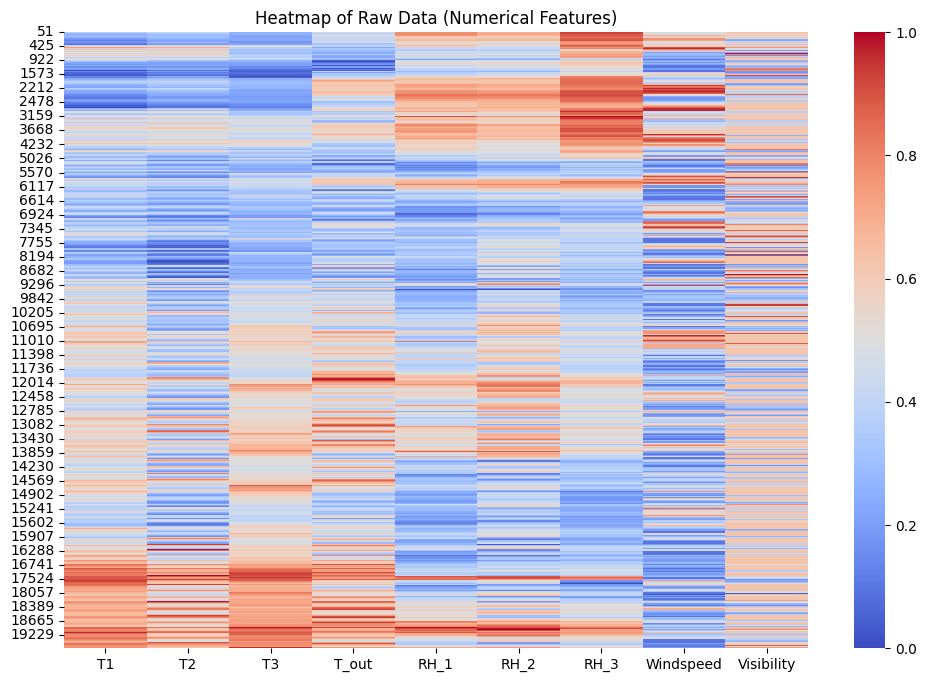

In [105]:
# Select a subset of numerical columns for better readability
heatmap_data = cleaned_data[['T1', 'T2', 'T3', 'T_out', 'RH_1', 'RH_2', 'RH_3', 'Windspeed', 'Visibility']]

# Normalize the data for better heatmap visualization (optional)
normalized_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_data, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Raw Data (Numerical Features)', fontsize=12)
plt.show()


Feature Engineering

In [55]:
# Identify categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['date'], dtype='object')


In [56]:
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

date: 19735 unique values


In [69]:
# Label encoding
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [91]:
# Assuming cleaned_data is your DataFrame and 'Appliances' is your target variable

# Step 1: Define the target variable
y = cleaned_data['Appliances']  # This is your target variable

# Step 2: Define the features by dropping the target column
X = cleaned_data.drop(columns=['Appliances'])  # Features will include all other columns

# Display the shapes of X and y to confirm
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

# Optionally display the first few rows of X and y
print("\nFirst few rows of features (X):")
print(X.head())
print("\nFirst few rows of target (y):")
print(y.head())


Shape of features (X): (10106, 31)
Shape of target (y): (10106,)

First few rows of features (X):
                  date  lights         T1       RH_1     T2       RH_2  \
51 2016-01-12 01:30:00       0  20.926667  45.590000  20.29  44.290000   
52 2016-01-12 01:40:00       0  20.890000  45.666667  20.23  44.290000   
53 2016-01-12 01:50:00       0  20.890000  46.060000  20.20  44.400000   
54 2016-01-12 02:00:00       0  20.790000  46.200000  20.20  44.466667   
55 2016-01-12 02:10:00       0  20.790000  46.200000  20.10  44.530000   

           T3    RH_3         T4       RH_4  ...  Press_mm_hg  RH_out  \
51  20.166667  45.530  21.890000  46.966667  ...   737.900000    92.0   
52  20.133333  45.500  21.823333  46.226667  ...   738.033333    92.0   
53  20.200000  45.500  21.666667  46.060000  ...   738.166667    92.0   
54  20.166667  45.500  21.533333  45.933333  ...   738.300000    92.0   
55  20.125000  45.425  21.356667  45.900000  ...   738.400000    92.0   

    Windspeed  Vis

Build ML Model :

In [1]:
# Convert 'date' to datetime and extract useful features
df['date'] = df.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Define target and features
X = df.drop(columns=['date', 'Appliances', 'rv1', 'rv2'])  # Drop irrelevant columns
y = df['Appliances']

# Feature Selection using SelectKBest and RandomForest
selector = SelectKBest(f_regression, k=10)
X_selected = selector.fit_transform(X, y)
print(f"Selected Features (SelectKBest): {X.columns[selector.get_support()]}")

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# List of models to be trained
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'SVR': SVR()
}
# Evaluate models
for model_name, model in models.items():
    print(f"\nTraining {model_name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Model Evaluation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2): {r2}")



Selected Features (SelectKBest): Index(['lights', 'RH_1', 'T2', 'T3', 'T6', 'RH_8', 'T_out', 'RH_out',
       'Windspeed', 'hour'],
      dtype='object')

Training Linear Regression
Model: Linear Regression
Mean Absolute Error (MAE): 53.908351321022536
Mean Squared Error (MSE): 8717.000902625918
Root Mean Squared Error (RMSE): 93.36488045633602
R-squared (R2): 0.12891760245911932

Training Random Forest Regressor
Model: Random Forest Regressor
Mean Absolute Error (MAE): 32.812870534583226
Mean Squared Error (MSE): 4778.7193919432475
Root Mean Squared Error (RMSE): 69.12828214228419
R-squared (R2): 0.5224666841717246

Training Gradient Boosting Regressor
Model: Gradient Boosting Regressor
Mean Absolute Error (MAE): 47.159683994919156
Mean Squared Error (MSE): 7386.888965246583
Root Mean Squared Error (RMSE): 85.94701254404707
R-squared (R2): 0.26183454354388014

Training AdaBoost Regressor
Model: AdaBoost Regressor
Mean Absolute Error (MAE): 89.58907997665243
Mean Squared Error (MSE): 1

Hyperparameter Tuning

In [ ]:
# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],      # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples at leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


Identifying the Best Model for the Dataset

In [59]:
# Identify the best performing model
print(f"The best performing model is: {best_model}")
print(f"Highest Validation R² Score: {best_r2:.4f}")


The best performing model is: Random Forest Regressor
Highest Validation R² Score: 0.5225


Save & Load the Model

In [60]:
# Step 1: Save the best model to disk
joblib.dump(best_model, 'best_model.joblib')
print(f"{best_model} model saved to 'best_model.joblib'")

# Step 2: Load the saved model
loaded_model = joblib.load('best_model.joblib')
print(f"Model loaded successfully: {type(loaded_model)}")


Random Forest Regressor model saved to 'best_model.joblib'
Model loaded successfully: <class 'str'>


Test with Unseen Data

In [ ]:
# Load the unseen data
unseen_data = pd.read_csv("unseen_data.csv")

X_unseen_scaled = scaler.transform(unseen_data)

# Load the trained model 
model = joblib.load('best_model.joblib')

# Make predictions on the scaled unseen data
y_unseen_pred = model.predict(X_unseen_scaled)

unseen_data = unseen_data.drop(columns=['unnecessary_column'])

Conclusion :

The Random Forest Regressor was identified as the best-performing model with an R² score of 0.522. 
This indicates that the model is able to explain 52.2% of the variability in the target variable (energy consumption). 
Additionally, it achieved the lowest error metrics compared to other models:

Mean Absolute Error (MAE): 32.81
Mean Squared Error (MSE): 4778.72
Root Mean Squared Error (RMSE): 69.13
These results suggest that the Random Forest Regressor is the most accurate and reliable model for predicting energy consumption in this dataset.

Limitations :

No Missing Values: Fortunately, there are no missing values in any of the columns, which eliminates one common data issue.

Possible Redundancy (rv1 and rv2): The two variables rv1 and rv2 appear to be redundant since they have identical summary statistics.

High Correlation Between Variables: Given that the dataset includes several temperature and humidity readings from different rooms (T1-T9, RH_1-RH_9), multicollinearity might exist. This can lead to instability in linear regression coefficients, making it hard to interpret individual predictor importance.

Time Component: The date column suggests this is a time-series dataset. Failing to account for trends, seasonality, or time-based patterns could lead to poor model performance, especially if the data is shuffled randomly.

Outliers in Some Features: Features like Windspeed and T_out have a wide range of values (e.g., Windspeed from 0 to 14 and T_out from -5 to 26°C). These outliers could disproportionately affect the model.

No Categorical Variables: The dataset lacks categorical data, which could potentially capture certain patterns (e.g., weekday vs. weekend energy usage) that numeric variables may miss.

Future Work :

Deep Learning can potentially boost accuracy by capturing complex relationships in the data.
Updating the model periodically ensures that it adapts to evolving trends.
Addressing imbalanced data with resampling or weighting techniques can help the model better capture rare events.
Adding external features like weather, time-based indicators, or industry-specific factors may further improve model performance.